<a href="https://colab.research.google.com/github/20195114/Detectron/blob/main/2024_03_12_%EC%8B%A4%EC%8A%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 차원 축소
# 공통 코드
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action='ignore')


# 차원 축소
# 공통 코드
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임

In [46]:
from sklearn.datasets import make_blobs

In [48]:
from sklearn.datasets import make_blobs

# 중심점의 좌표
blob_centers = np.array([[.2, .3], [-1.5,2.3], [-2.8,1.8], [-2.8, 2.8], [-2.8, 1.3]])

# 중심점에서의 편차
blob_std = np.array([.4, .3, .1, .1, .1])

# 데이터 생성
X, y = make_blobs(n_samples = 2000, centers=blob_centers,
                 cluster_std = blob_std, random_state=42)
print(X)

[[-2.78161655  3.06930337]
 [ 0.9528098   0.83816802]
 [-1.92550972  1.77175736]
 ...
 [ 0.45543698 -0.36460802]
 [-2.93171319  2.87760279]
 [-2.803323    1.77918831]]


In [17]:
#군집을 수행
from sklearn.cluster import KMeans

#클러스터 개수
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(y_pred[:100]) #예측한 클러스터를 출력


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2]


In [49]:
# 전체 거리 계산을 수행하는 k-means
import time
start = time.time()
kmeans = KMeans(n_clusters=k, random_state=42, algorithm='full')
y_pred = kmeans.fit_predict(X)
end = time.time()
print(end-start)
print(kmeans.inertia_)

0.03107166290283203
217.9587645551701


In [51]:
# elkan's
# 거리의 상한과 하한 사용해 군집 수행하는 k-means
start = time.time()
kmeans = KMeans(n_clusters=k, random_state=42, algorithm='elkan')
y_pred = kmeans.fit_predict(X)
end = time.time()
print(end-start)
print(kmeans.inertia_)

0.04487919807434082
217.9587645551701


In [50]:
tot_time = 0
for i in range(1000):
    start = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42, algorithm='elkan')
    y_pred = kmeans.fit_predict(X)
    end = time.time()
    tot_time += (end-start)
print(tot_time/1000)
print(kmeans.inertia_)

0.07197125029563904
217.9587645551701


[4498.293924144495, 1257.8316663599762, 673.7824972824867, 270.4110204111315, 217.9587645551701, 176.48761832292305, 149.73185972123542, 123.94048760188613, 110.00783183760296]


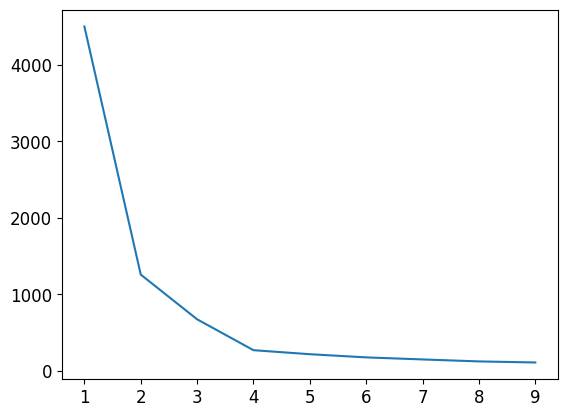

In [52]:
from sklearn.cluster import KMeans
# 이너셔를 이용한 클러스터 개수 선택
kmeans_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1,10)]
# 이너셔를 확인
inertias = [model.inertia_ for model in kmeans_k]
print(inertias)

plt.plot(range(1,10), inertias)
plt.show()

In [53]:
# 실루엣 점수 확인
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.690632654143417


In [56]:
kmeans_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(2,20)]

silhouette_scores = [silhouette_score(X, model.labels_ )for model in kmeans_k]
print(silhouette_scores)

[0.6954304099191764, 0.5953410096138994, 0.7191873626687127, 0.690632654143417, 0.6087706495269795, 0.6139967230811656, 0.5615327821068482, 0.5649508274764475, 0.5613874163975617, 0.560283712938183, 0.5563213003386304, 0.5506659440126975, 0.47984621522227666, 0.5563894470629493, 0.5566944482561408, 0.45814262834552427, 0.45532442683669877, 0.42174990384515354]


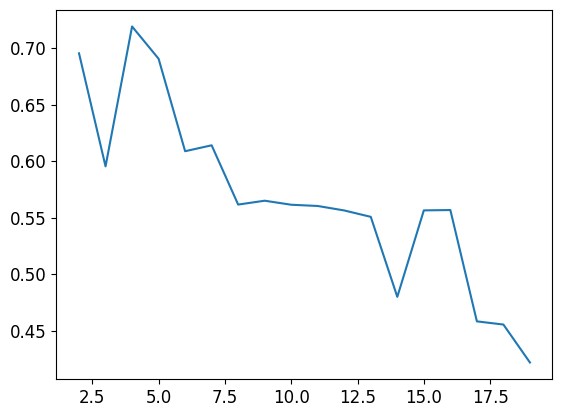

In [55]:
plt.plot(range(2, 20), silhouette_scores)
plt.show()

[0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1]


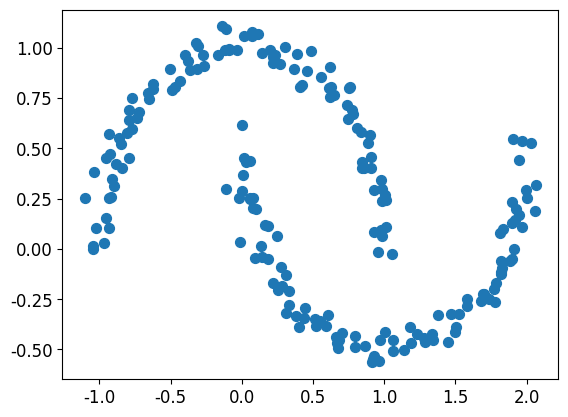

In [40]:
from sklearn.datasets import make_moons
# 0과 1 두가지 클래스를 가진 반원 모양의 데이터 생성
X, y = make_moons(200, noise = 0.05, random_state = 42)
plt.scatter(X[:,0], X[:, 1], s = 50, cmap = 'viridis')
print(y)

[0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0]


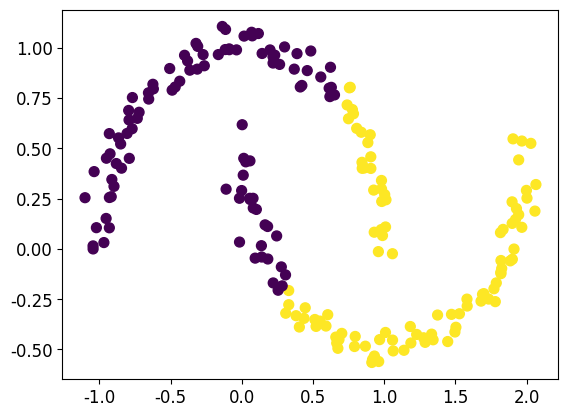

In [43]:
labels = KMeans(2, random_state = 42).fit_predict(X)

plt.scatter(X[:,0], X[:, 1], c = labels , s = 50, cmap = 'viridis')
print(labels)

In [62]:
# 계층적 클러스터링
# 샘플 데이터 생성 과 거리 계산
np.random.seed(42)

# 피처의 이름 - 3개
vaiables = ['X', 'Y', 'Z']

# 행의 이름(인덱스) - 5개
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

# 데이터 생성
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns = vaiables, index = labels)
print(df)

             X         Y         Z
ID_0  3.745401  9.507143  7.319939
ID_1  5.986585  1.560186  1.559945
ID_2  0.580836  8.661761  6.011150
ID_3  7.080726  0.205845  9.699099
ID_4  8.324426  2.123391  1.818250


In [63]:
# 각 데이터의 유클리디안 거리를 계산해서 데이터프레임으로 생성
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)

print(row_dist)

           ID_0       ID_1       ID_2       ID_3       ID_4
ID_0   0.000000  10.067500   3.527332  10.163608  10.283767
ID_1  10.067500   0.000000   9.973350   8.323293   2.418558
ID_2   3.527332   9.973350   0.000000  11.285037  10.967857
ID_3  10.163608   8.323293  11.285037   0.000000   8.205581
ID_4  10.283767   2.418558  10.967857   8.205581   0.000000


In [66]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage

# 완전 연결 방식을 이용한 상향식 클러스터링 수행
row_clusters = linkage(row_dist , method = 'complete')
print(row_clusters)

# 첫번째 와 두번째 묶인 트리의 클러스터 이름이고 세번째는 클러스터간의 거리이고
# 네번째는 클러스터 안의 데이터 개수
# 이 경우는 처음 시작할 때 5개의 데이터이므로 기본 클러스터 이름 0 - 4
# 뮦일 때 마다 클러스터가 번호가 순차적으로 추가됩니다.

[[ 1.          4.          3.5705069   2.        ]
 [ 0.          2.          5.15932058  2.        ]
 [ 3.          5.         13.18232871  3.        ]
 [ 6.          7.         18.78284112  5.        ]]


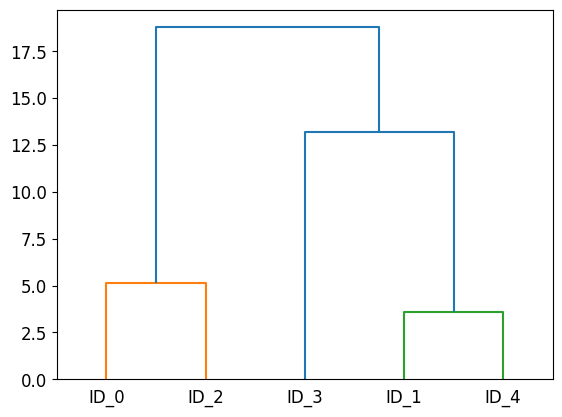

In [68]:
# 계층형 클러스터링 시각화

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.show()

In [70]:
# GMM(가우시안 혼합 모델)
# API 활용
X1, y1 = make_blobs(n_samples = 1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples = 250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]



In [71]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init = 10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [72]:
# 각 클러스터의 평균을 확인
print(gm.means_)

[[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]


In [74]:
print(gm.predict(X)) # 예측 - 하드 군집

[0 0 1 ... 2 2 2]


In [75]:
print(gm.predict_proba(X)) # 확률 예측 - 소프트 군집
# 확률이 가장 높은 정규 분포의 클러스터에 배정


[[9.76741808e-01 6.78581203e-07 2.32575136e-02]
 [9.82832955e-01 6.76173663e-04 1.64908714e-02]
 [7.46494398e-05 9.99923327e-01 2.02398402e-06]
 ...
 [4.26050456e-07 2.15512941e-26 9.99999574e-01]
 [5.04987704e-16 1.48083217e-41 1.00000000e+00]
 [2.24602826e-15 8.11457779e-41 1.00000000e+00]]


In [76]:
print(gm.bic(X))

8189.747000497186


In [78]:
print(gm.aic(X))

8102.521720382148


In [84]:
# 최적의 클러스터 개수 찾기
# 클러스터 개수를 1개 부터 10개까지 갖는 GMM 모델을 생성
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]


In [87]:
# bic 와 aic 값을 전부 저장
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

In [88]:
print(bics)
print(aics)

[9330.418496222055, 8971.197133122107, 8189.747000497186, 8229.595643711533, 8273.78524672955, 8311.996155416307, 8350.89457398886, 8391.038436209936, 8432.267971405674, 8465.222274137557]
[9304.764002070573, 8914.757245988847, 8102.521720382148, 8111.584970614717, 8124.989180650957, 8132.414696355936, 8140.52772194671, 8149.886191186008, 8160.3303333999675, 8162.499243150073]


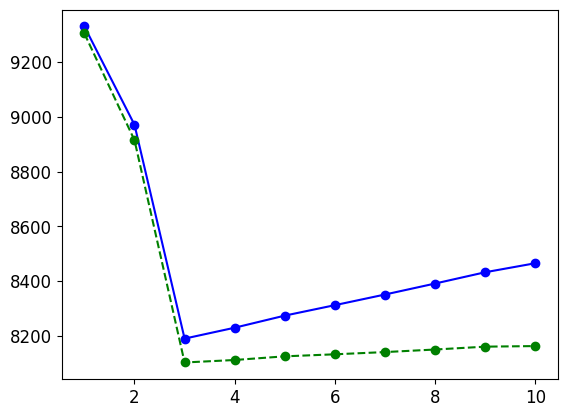

In [91]:
plt.plot(range(1, 11), bics,"bo-", label = "BIC")
plt.plot(range(1, 11), aics, "go--", label = "AIC")
plt.show()
# 2개의 값 모두 3까지는 줄어들다가 4부터 높아집니다.
# 3개의 클러스터로 군집을 만드느것이 좋습니다.

In [97]:
#BayesianGaussianMixture 모델 사용
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42).fit(X)

print(np.round(bgm.weights_, 3))

[0.395 0.205 0.4   0.    0.    0.    0.    0.    0.    0.   ]


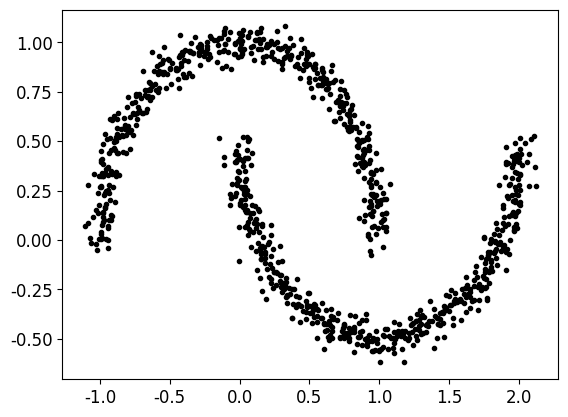

[0.12 0.12 0.13 0.16 0.12 0.13 0.14 0.   0.08 0.  ]


In [101]:
# 문제점 - 반달 모양의 데이터를 하나의 클러스터로 감지하지 못함
X_moons, y_moons = make_moons(n_samples = 1000, noise = 0.05, random_state = 42)

plt.plot(X_moons[:, 0], X_moons[:, 1], 'k.')
plt.show()
# 타원형 데이터는 잘 구분하는데 반달처럼 이어지기는 하지만
# 중간 중간 방향이나 기울기가 변경되면 다른 클러스터로 간주
# 이번의 경우는 8개의 클러스터로 구분
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X_moons)

print(np.round(bgm.weights_, 2))